# Introdução a regressão linear

Regressão linear é o processo de traçar uma reta através dos dados em um diagrama de dispersão. A reta resume esses dados, o que é útil quando fazemos previsões.

## O que é regressão linear?
Quando vemos uma relação em um diagrama de dispersão, podemos usar uma reta para resumir essa relação nos dados. Também podemos usar essa reta para fazer previsões a partir dos dados. Este processo é chamado de regressão linear.

Uma regressão linear simples, por exemplo, possui apenas uma variável independente $x$. Assim, podemos representar a equação que prevê o valor de $y$ em função de $x$ como:
$$y=\alpha x + \beta$$

onde $\alpha$ é conhecida como constante angular e $\beta$ como constante de interceptação.

## Como ajustar uma reta aos dados
Há maneiras mais avanças de ajustar uma reta aos dados, mas, em geral, queremos que a reta passe pelo "meio" dos pontos.

Exemplo: Considerando que um conjunto de dados segue um padrão aproximadamente linear segundo a função $y=2 x - 1 + \epsilon$, onde $\epsilon$ é chamado de ruído, temos o gráfico a seguir:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

x = np.linspace(0, 10, 100)
y = [2 * x - 1 + random.normalvariate(mu=0, sigma=1) 
     for x in np.linspace(0, 10, 100)]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

Apesar dos pontos possuirem uma componente aleatória $\epsilon$, claramente os dados se comportam de maneira linear. Mais precisamente, segundo a função linear $$\hat{y} = 2x - 1$$

Traçando a reta no gráfico anterior temos...

Text(0, 0.5, 'y')

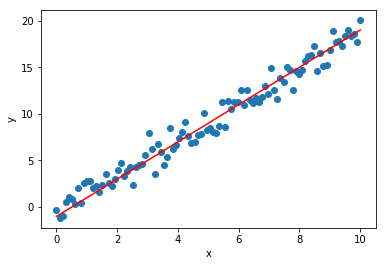

In [2]:
y_ = [2 * x - 1 for x in np.linspace(0, 10, 100)]

plt.scatter(x, y)
plt.plot(x, y_, color='r')
plt.xlabel('x')
plt.ylabel('y')

## Regressão linear para previsão
Utilizando uma regressão linear, é possível criar um modelo preditivo para o preço dos imóveis baseado na área construída.

No python, temos o pacote "sklearn", utilizado para criação de modelos de aprendizado de máquina. Nesse pacote temos disponível o módulo de regressão, incluindo a regressão linear simples.

O primeiro passo é a importação do pacote.

In [3]:
from sklearn.linear_model import LinearRegression

Tudo o que o modelo de regressão linear precisa são os valores de "x" e "y", onde "x" representa os valores independentes e "y" representa os valores dependentes.

Para exemplificar, utlizaremos a tabela "housing_ok.csv".

In [4]:
import pandas as pd
housing = pd.read_csv('housing_ok.csv')

Observamos anteriormente, que existe uma relação linear visível entre o preço dos imóveis e a área construída. 

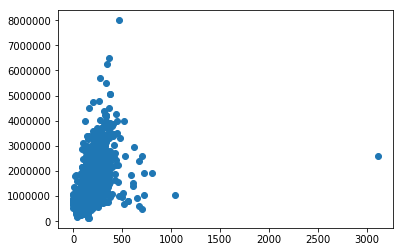

In [5]:
plt.scatter(housing.area_construida, housing.preco)

Observamos também, que existe um ponto que não obedece ao padrão de comportamento dos demais (outlier). Para eliminálo, utilizamos um filtro que desconsidera  valores de área contruída maior que 1500 metros quadrados.

In [6]:
housing = housing[housing.area_construida < 1500].copy()

Analisando mais uma vez o gráfico:

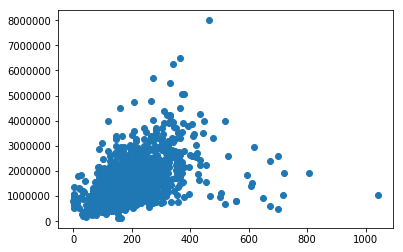

In [7]:
plt.scatter(housing.area_construida, housing.preco)

In [8]:
X = housing.area_construida.values.reshape(-1, 1)
y = housing.preco.values

A partir desse ponto podemos iniciar o processo do cálculo da regressão linear. Primeiramente, faremos a escolha dos valores de $x$ e $y$.

Observe que acrescentamos ".values" no final de cada comando. Esse comando faz com que somente os valores da coluna sejam atribuidos a "x" e "y". 

O comando ".reshape(-1, 1)" que aparece nos valores "x" é obrigatório para que o modelo não retorne erro. Sua função é de mudar o formato do vetor de linha para coluna.

Para criar o modelo de regressão basta utilizar o comando a seguir:

In [9]:
reg = LinearRegression().fit(X, y)

Interpretamos o comando acima da seguinte forma: reg (variável que guardará o modelo) recebe modelo de regressão linear "LinearRegression()" ajustando a reta para os valores x e y "fit(x, y)"

Uma vez criado, podemos fazer previsões de preço a partir de valores de área contruída. Para tanto, utilizamos o comando ".predict". 

No exemplo abaixo faremos a previsão do preço de um imóvel com 100 metros quadrados.

In [10]:
reg.predict([[100]])

array([949276.34507153])

O valor previsto ( ou esperado) de um imóvel com 100 metros quadrados é de aproximadamente $ 949.276,00

Podemos então visualizar a reta da regressão no gráfico scatter.

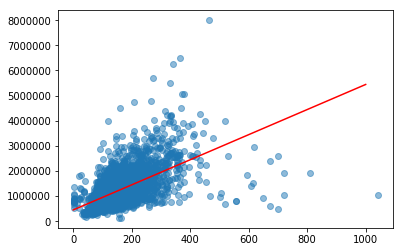

In [11]:
import numpy as np
x = np.linspace(0, 1000, 3000).reshape(-1, 1)
plt.scatter(x=housing.area_construida, y=housing.preco, alpha=0.5)
plt.plot(x, reg.predict(x), color='r')

## Avaliando a quanlidade da previsão
Para avaliar a qualidade da regressão utilizamos o erro médio quadrático $R^2$. Para obter o valor do erro utilizamos a função score().

Por exemplo: para a regressão feita anteriormente, o valor do erro é igual a:

In [12]:
reg.score(X, y)

0.34086830273672386

Podemos utilizar o score para comparar a qualidade do modelo de regressão antes e depois da eliminação de supostos outliers.

No exemplo anterior, faremos a comparação do score antes e depois de eliminar os resistros com área construida superior a 1500 metros quadrados. Para isso, faremos a importação dos dados mais uma vez (para eliminar os filtros feitos anteriormente).

In [13]:
housing = pd.read_csv('housing_ok.csv')

In [14]:
X = housing.area_construida.values.reshape(-1, 1)
y = housing.preco

Criando o novo modelo de regressão:

In [15]:
reg_novo = LinearRegression().fit(X, y)

Medindo o escore:

In [16]:
reg_novo.score(X, y)

0.25708149151338033

Observe que o modelo de regressão criado sem a eliminação do outlier obteve score menor que o criado com a eliminação. O valor inferior sugere que o segundo modelo é melhor que o primeiro.

Visualizando a linha de regressão com os dados:

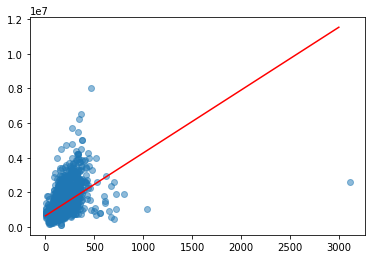

In [17]:
x = np.linspace(0, 3000, 3000).reshape(-1, 1)
plt.scatter(x=housing.area_construida, y=housing.preco, alpha=0.5)
plt.plot(x, reg_novo.predict(x), color='r')